In [225]:
import pandas as pd
import numpy as np

In [226]:
# Import prospective dataset
df= pd.read_excel('H:/RediMinds/DRMahen/Preethi PN_Data validation_2014-2018.xlsx', sheet_name='PN_Data validation_2014-2018')

In [227]:
# Import prospective dataset
input_path = 'H:\RediMinds\VCQI'
test = pd.read_csv(input_path+"\VCQI_clean_test.csv")

In [228]:
test = test.merge(df[['PATIENTNUMBER','R.E.N.A.L.NEPHROSCORE', 'PADUASCORE']],left_on='PATIENTNUMBER',right_on='PATIENTNUMBER')

In [229]:
test_renal = test.dropna(subset=['R.E.N.A.L.NEPHROSCORE']).copy()

In [230]:
test_renal['R.E.N.A.L.NEPHROSCORE'].value_counts()

8       48
7       43
9       38
6       35
5       24
7a      22
4       21
10      19
5a      17
6a      14
8p      14
5p      13
8x      11
8a      11
9p      11
9a      10
4a       9
7p       9
10p      7
4p       7
6p       7
11       7
9x       7
6x       6
10x      5
10a      4
7x       3
9ah      2
5x       2
9ph      2
3p       1
9xh      1
11ph     1
11xh     1
11x      1
11p      1
3        1
5ah      1
8ah      1
10ph     1
4x       1
10ah     1
Name: R.E.N.A.L.NEPHROSCORE, dtype: int64

In [231]:
test_renal['RENAL_SCORE'] = test_renal['R.E.N.A.L.NEPHROSCORE'].map(lambda x : int(re.findall(r'\d+', x)[0]))

In [232]:
x = test_renal['RENAL_SCORE'].unique().tolist()

In [233]:
x.sort()#reverse=True)

In [234]:
dict_precision = {}
dict_recall = {}
from sklearn import metrics
for i in x:
    test_renal['Pred'] = test_renal['RENAL_SCORE'].apply(lambda y: 1 if y>=i else 0)
    #print(i, metrics.confusion_matrix(test['INTRA_OP_COMPLICATIONS'], test['Pred']))
    dict_precision.update({i:metrics.precision_score(test_renal['INTRA_OP_COMPLICATIONS'], test_renal['Pred'])})
    dict_recall.update({i:metrics.recall_score(test_renal['INTRA_OP_COMPLICATIONS'], test_renal['Pred'])})

In [235]:
dict_precision

{3: 0.05909090909090909,
 4: 0.0593607305936073,
 5: 0.065,
 6: 0.06705539358600583,
 7: 0.06761565836298933,
 8: 0.07352941176470588,
 9: 0.07563025210084033,
 10: 0.041666666666666664,
 11: 0.0}

In [236]:
dict_recall

{3: 1.0,
 4: 1.0,
 5: 1.0,
 6: 0.8846153846153846,
 7: 0.7307692307692307,
 8: 0.5769230769230769,
 9: 0.34615384615384615,
 10: 0.07692307692307693,
 11: 0.0}

In [237]:
# AUC-PR for RENAL SCORE
metrics.auc(list(dict_recall.values()),list(dict_precision.values()))

0.06343846955699882

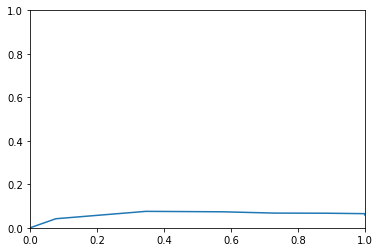

In [238]:
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(list(dict_recall.values()),list(dict_precision.values()))

### Calculate AUC-PR for PADUA Score

In [239]:
test_padua = test.dropna(subset=['PADUASCORE']).copy()

In [240]:
test_padua['PADUASCORE'].value_counts()

7.0     94
9.0     88
8.0     72
10.0    68
6.0     61
11.0    38
12.0    17
13.0     3
Name: PADUASCORE, dtype: int64

In [241]:
x = test_padua['PADUASCORE'].unique().tolist()

In [242]:
x.sort(reverse=True)

In [243]:
x

[13.0, 12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0]

In [244]:
dict_precision = {}
dict_recall = {}
from sklearn import metrics
for i in x:
    test_renal['Pred'] = test_renal['PADUASCORE'].apply(lambda y: 1 if y>=i else 0)
    #print(i, metrics.confusion_matrix(test['INTRA_OP_COMPLICATIONS'], test['Pred']))
    dict_precision.update({i:metrics.precision_score(test_renal['INTRA_OP_COMPLICATIONS'], test_renal['Pred'])})
    dict_recall.update({i:metrics.recall_score(test_renal['INTRA_OP_COMPLICATIONS'], test_renal['Pred'])})

In [245]:
dict_precision

{13.0: 0.0,
 12.0: 0.05263157894736842,
 11.0: 0.03508771929824561,
 10.0: 0.056451612903225805,
 9.0: 0.07246376811594203,
 8.0: 0.06159420289855073,
 7.0: 0.06593406593406594,
 6.0: 0.059665871121718374}

In [246]:
dict_recall

{13.0: 0.0,
 12.0: 0.038461538461538464,
 11.0: 0.07692307692307693,
 10.0: 0.2692307692307692,
 9.0: 0.5769230769230769,
 8.0: 0.6538461538461539,
 7.0: 0.9230769230769231,
 6.0: 0.9615384615384616}

In [247]:
metrics.auc(list(dict_recall.values()),list(dict_precision.values()))

0.05607277590897633

In [248]:
import matplotlib.pyplot as plt

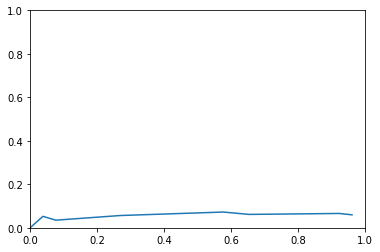

In [249]:
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(list(dict_recall.values()),list(dict_precision.values()))